
## K Means Clustering and Principal Component Analysis 

For this project I will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
**I actually have the labels for this data set, but I will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Get the Data

In [4]:
df = pd.read_csv('College_Data',index_col=[0])

In [5]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [82]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### EDA


<AxesSubplot:xlabel='Grad.Rate', ylabel='Room.Board'>

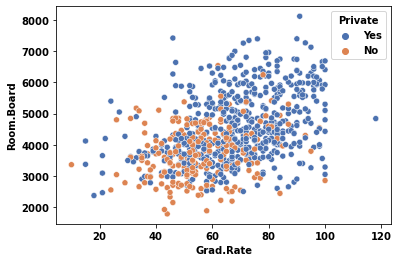

In [7]:
sns.scatterplot(data = df, x= 'Grad.Rate', y = 'Room.Board', hue = 'Private', palette='deep')

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

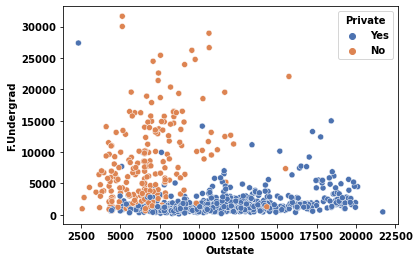

In [8]:
sns.scatterplot(data = df, x = 'Outstate', y ='F.Undergrad', hue = 'Private', palette= 'deep')

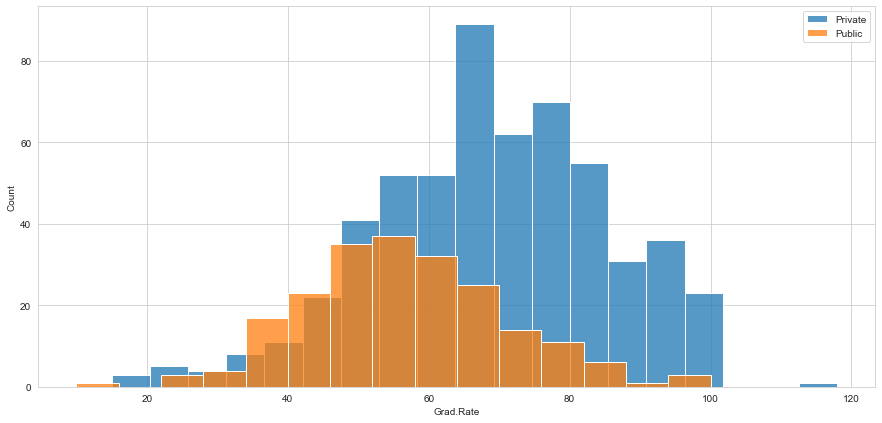

In [9]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (15,7))
sns.histplot(data = df[df ['Private'] == 'Yes'], x = 'Grad.Rate', ax = ax);
sns.histplot(data = df[df ['Private'] == 'No'], x = 'Grad.Rate', ax = ax, color=sns.color_palette(n_colors=2)[1]);
ax.legend(['Private','Public']);

**there seems to be a private school with a graduation rate of higher than 100%. What?**

In [10]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


I set that school's graduation rate to 100 so it makes sense.

In [11]:
df.loc [df['Grad.Rate']>100,'Grad.Rate'] = 100

### K Means Cluster Creation


In [12]:
kmeans = KMeans(n_clusters= 2)

In [13]:
kmeans.fit (df.drop('Private', axis = 1))

KMeans(n_clusters=2)

The cluster center are

In [14]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Evaluation

In [15]:
df['Private_class'] = pd.get_dummies(df['Private'],drop_first=True)
df['Private_class_pred'] = kmeans.labels_

In [17]:
confusion_matrix(df['Private_class'], kmeans.labels_)

array([[138,  74],
       [531,  34]], dtype=int64)

In [18]:
print(classification_report(df['Private_class'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

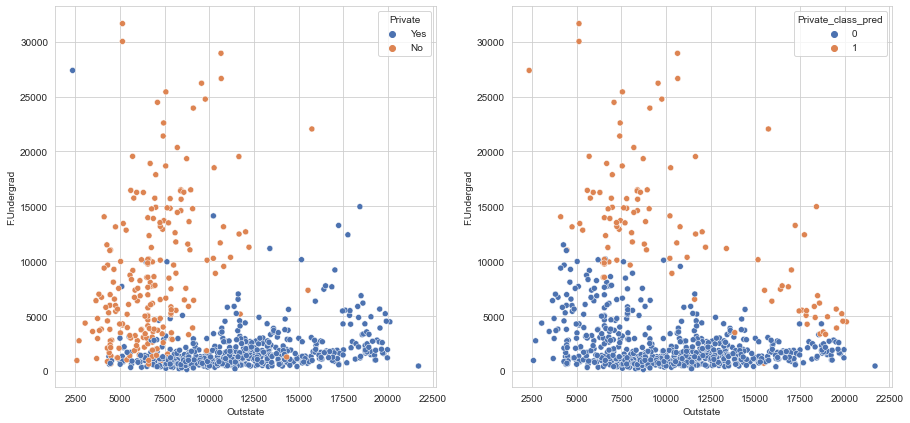

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (15,7))
sns.scatterplot(data = df, x = 'Outstate', y ='F.Undergrad', hue = 'Private', palette='deep', ax = ax [0])
sns.scatterplot(data = df, x = 'Outstate', y ='F.Undergrad', hue = 'Private_class_pred', palette='deep', ax = ax [1])


We can see that the results are not remarkable but good enough, I guess!

**One way to enhance the prediction accuracy is to perform principal analysis and feature decomposition**

### Principal Component Analysis (PCA)

In [34]:
#First, normalized the data
scaler = StandardScaler()
scaler.fit (df.drop(['Private','Private_class','Private_class_pred'],axis = 1))
scaled_data = scaler.transform(df.drop(['Private','Private_class','Private_class_pred'],axis = 1))
scaled_data

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.17992933e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51804628e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.68710475e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.60975094e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.96167109e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.96167109e+00]])

In [36]:
pca = PCA (n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform (scaled_data)
scaled_data.shape
x_pca.shape

(777, 2)

#### Repeat the clustering, this time on the principal components

In [38]:
kmeans.fit (x_pca)

KMeans(n_clusters=2)

In [42]:
df['Private_class_pred_PCA'] = kmeans.labels_
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,...,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_class,Private_class_pred,Private_class_pred_PCA
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,...,2200,70,78,18.1,12,7041,60,1,0,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,...,1500,29,30,12.2,16,10527,56,1,0,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,...,1165,53,66,12.9,30,8735,54,1,0,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,...,875,92,97,7.7,37,19016,59,1,0,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,...,1500,76,72,11.9,2,10922,15,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,...,1200,60,60,21.0,14,4469,40,0,0,0
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,...,1250,73,75,13.3,31,9189,83,1,0,0
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,...,781,67,75,14.4,20,8323,49,1,0,0
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,...,2115,96,96,5.8,49,40386,99,1,1,1


### Evaluation

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

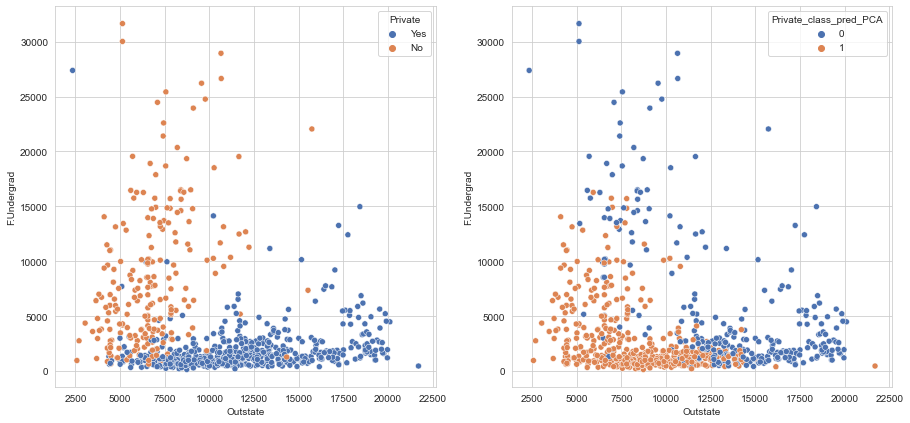

In [82]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (15,7))
sns.scatterplot(data = df, x = 'Outstate', y ='F.Undergrad', hue = 'Private', palette='deep', ax = ax [0])
sns.scatterplot(data = df, x = 'Outstate', y ='F.Undergrad', hue = 'Private_class_pred_PCA', palette='deep', ax = ax [1],hue_order=[0,1])


In [59]:
cmap

<module 'seaborn.palettes' from 'C:\\Users\\hamed\\anaconda3\\lib\\site-packages\\seaborn\\palettes.py'>

In [62]:
print(classification_report(df['Private_class'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.29      0.69      0.41       212
           1       0.76      0.38      0.51       565

    accuracy                           0.46       777
   macro avg       0.53      0.53      0.46       777
weighted avg       0.64      0.46      0.48       777



**it is seen that the precision imporves**
**to improve it even more, I repeat the same process with 3 PCA**

In [86]:
pca = PCA (n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform (scaled_data)


kmeans.fit (x_pca)
df['Private_class_pred_PCA'] = kmeans.labels_

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

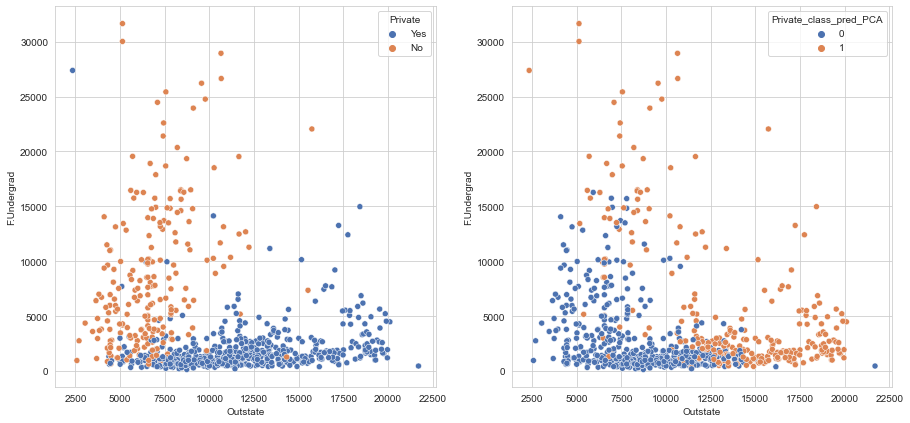

In [87]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (15,7))
sns.scatterplot(data = df, x = 'Outstate', y ='F.Undergrad', hue = 'Private', palette='deep', ax = ax [0])
sns.scatterplot(data = df, x = 'Outstate', y ='F.Undergrad', hue = 'Private_class_pred_PCA', palette='deep', \
                hue_order=[0,1],ax = ax [1])

In [89]:
print(classification_report(df['Private_class'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.29      0.69      0.41       212
           1       0.76      0.38      0.51       565

    accuracy                           0.46       777
   macro avg       0.53      0.53      0.46       777
weighted avg       0.64      0.46      0.48       777



**No significant improvement is seen in the results**
**Therefore, the clsutering that we did with 2 PCA is good enough**